In [6]:
### 1. 필수 라이브러리 임포트
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix

In [8]:
### 2. 데이터셋 로드 및 전처리
# MNIST 데이터셋 로드
(train_X, train_y), (test_X, test_y) = mnist.load_data()

# 데이터 정규화 및 차원 확장 (CNN 입력 형태 맞추기)
train_X_cnn = train_X.reshape(-1, 28, 28, 1).astype('float32') / 255.0
test_X_cnn = test_X.reshape(-1, 28, 28, 1).astype('float32') / 255.0

# 레이블 원-핫 인코딩
train_y_cnn = to_categorical(train_y, 10)
test_y_cnn = to_categorical(test_y, 10)

In [10]:
### 3. CNN 모델 구성
# Sequential API를 사용한 모델 정의
cnn_model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),  # 첫 번째 합성곱 층
    MaxPooling2D((2,2)),                                          # 풀링 층
    Conv2D(64, (3,3), activation='relu'),                         # 두 번째 합성곱 층
    MaxPooling2D((2,2)),                                          # 풀링 층
    Flatten(),                                                     # 평탄화 층
    Dense(128, activation='relu'),                                # 완전 연결 층
    Dense(10, activation='softmax')                               # 출력 층
])

# 모델 컴파일
cnn_model.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

In [12]:
### 4. 모델 학습
# 5 에포크 동안 배치 크기 32로 학습
history = cnn_model.fit(train_X_cnn, train_y_cnn, 
                       epochs=5, 
                       batch_size=32,
                       validation_data=(test_X_cnn, test_y_cnn))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9111 - loss: 0.2937 - val_accuracy: 0.9811 - val_loss: 0.0638
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9829 - loss: 0.0557 - val_accuracy: 0.9866 - val_loss: 0.0408
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.9861 - loss: 0.0500 - val_accuracy: 0.9884 - val_loss: 0.0441
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.9872 - loss: 0.0535 - val_accuracy: 0.9865 - val_loss: 0.0615
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9860 - loss: 0.0972 - val_accuracy: 0.9794 - val_loss: 0.2193


In [14]:
### 5. 성능 평가
# 테스트 데이터 예측
cnn_pred_probs = cnn_model.predict(test_X_cnn)
cnn_pred = np.argmax(cnn_pred_probs, axis=1)

# 성능 지표 계산
print("\n=== CNN 성능 지표 ===")
print(f"F1 Score: {f1_score(test_y, cnn_pred, average='macro'):.4f}")
print(f"Precision: {precision_score(test_y, cnn_pred, average='macro'):.4f}")
print(f"Recall: {recall_score(test_y, cnn_pred, average='macro'):.4f}")

# 혼동 행렬 출력
print("\n=== Confusion Matrix ===")
print(confusion_matrix(test_y, cnn_pred))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

=== CNN 성능 지표 ===
F1 Score: 0.9793
Precision: 0.9794
Recall: 0.9797

=== Confusion Matrix ===
[[ 961    0    0    0    0    4   10    2    3    0]
 [   0 1098    1    2    0    5    7    1   21    0]
 [   1    0 1015    1    0    0    1    3   11    0]
 [   0    0    0  993    0   11    0    2    4    0]
 [   2    0    0    0  963    0    4    2    8    3]
 [   1    0    1    2    0  876   11    0    1    0]
 [   0    2    0    0    1    1  954    0    0    0]
 [   0    3    5    4    0    1    0 1001   10    4]
 [   1    0    1    1    0    1    3    0  966    1]
 [   4    1    0    2    4    9    0    2   20  967]]


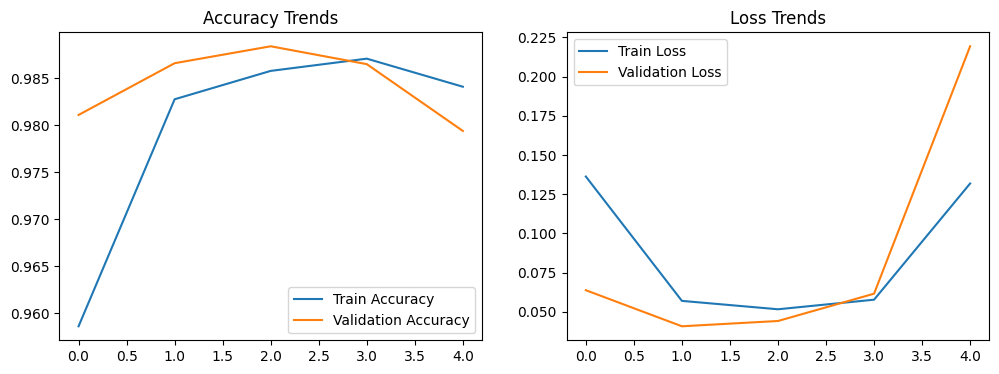

In [16]:
### 6. 학습 과정 시각화
plt.figure(figsize=(12, 4))

# 정확도 그래프
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Trends')
plt.legend()

# 손실 그래프
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Trends')
plt.legend()

plt.show()